# HomeWork 2 Juypter Book

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Deep-Learning

NOTE FOR GRADER : THIS NOTEBOOK REQUIRES A FILE CALLED "hw2Models.py" TO RUN. PLEASE HAVE THIS FILE IN THE SAME DIRECTORY OR THIS CODE WILL NOT WORK

# Libary Imports

In [18]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import torch
from hw2Models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 1 

AlexNet is originally proposed for 227*227 image sizes. It may be too complex for the CIFAR-10 and CIFAR-100 datasets, in particular, due to the low resolution of the initial images; try simplifying the model to make the training faster while ensuring that the accuracy stays relatively high. Report the training loss, validation loss, and validation accuracy. Also, report the number of parameters in your modified version of AlexNet and compare it against the number of parameters in the original AlexNet architectures. Here is a good reference guide to AlexNet: https://www.kaggle.com/code/blurredmachine/alexnet-architecture-a-complete-guideLinks to an external site.

Explore the option of applying Dropout techniques for training your customized AlexNet. Compare the training and validation results against the baseline model without any dropout. Also, compare the results between CIFAR-10 and CIFAR-100.

Here are some information about CIFAR-100

https://paperswithcode.com/dataset/cifar-100Links to an external site.

https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR100.htmlLinks to an external site.

In [19]:
# Simply loading data 

trainLoader, testLoader = getDataLoaders(dataset_name='cifar10', batch_size=128)
trainLoader_cifar100, testLoader_cifar100 = getDataLoaders(dataset_name='cifar100', batch_size=128)

classLabels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [7]:
alexNetBaseline = AlexNet()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(alexNetBaseline, 
                                                                                     trainLoader, 
                                                                                     testLoader,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [03:50<00:00,  1.69it/s]


Epoch 1, Train Loss: 1.9853, Train Acc: 27.07%, Val Loss: 1.5227, Val Acc: 42.29%


Epoch 2/15: 100%|██████████| 391/391 [04:28<00:00,  1.45it/s]


Epoch 2, Train Loss: 1.4764, Train Acc: 45.67%, Val Loss: 1.3069, Val Acc: 52.66%


Epoch 3/15: 100%|██████████| 391/391 [04:57<00:00,  1.31it/s]


Epoch 3, Train Loss: 1.2935, Train Acc: 53.07%, Val Loss: 1.1260, Val Acc: 59.29%


Epoch 4/15: 100%|██████████| 391/391 [04:58<00:00,  1.31it/s]


Epoch 4, Train Loss: 1.1651, Train Acc: 58.12%, Val Loss: 1.0590, Val Acc: 61.84%


Epoch 5/15: 100%|██████████| 391/391 [05:05<00:00,  1.28it/s]


Epoch 5, Train Loss: 1.0543, Train Acc: 62.21%, Val Loss: 0.9360, Val Acc: 66.58%


Epoch 6/15: 100%|██████████| 391/391 [05:04<00:00,  1.28it/s]


Epoch 6, Train Loss: 0.9743, Train Acc: 65.02%, Val Loss: 0.8680, Val Acc: 69.38%


Epoch 7/15: 100%|██████████| 391/391 [05:04<00:00,  1.28it/s]


Epoch 7, Train Loss: 0.8939, Train Acc: 68.17%, Val Loss: 0.8644, Val Acc: 69.29%


Epoch 8/15: 100%|██████████| 391/391 [05:02<00:00,  1.29it/s]


Epoch 8, Train Loss: 0.8491, Train Acc: 69.80%, Val Loss: 0.8193, Val Acc: 71.28%


Epoch 9/15: 100%|██████████| 391/391 [05:03<00:00,  1.29it/s]


Epoch 9, Train Loss: 0.7867, Train Acc: 72.06%, Val Loss: 0.7605, Val Acc: 72.90%


Epoch 10/15: 100%|██████████| 391/391 [05:02<00:00,  1.29it/s]


Epoch 10, Train Loss: 0.7419, Train Acc: 73.75%, Val Loss: 0.7434, Val Acc: 74.06%


Epoch 11/15: 100%|██████████| 391/391 [05:04<00:00,  1.28it/s]


Epoch 11, Train Loss: 0.6998, Train Acc: 75.09%, Val Loss: 0.7389, Val Acc: 74.89%


Epoch 12/15: 100%|██████████| 391/391 [05:03<00:00,  1.29it/s]


Epoch 12, Train Loss: 0.6647, Train Acc: 76.45%, Val Loss: 0.6605, Val Acc: 77.31%


Epoch 13/15: 100%|██████████| 391/391 [05:04<00:00,  1.29it/s]


Epoch 13, Train Loss: 0.6269, Train Acc: 78.17%, Val Loss: 0.6625, Val Acc: 77.29%


Epoch 14/15: 100%|██████████| 391/391 [05:02<00:00,  1.29it/s]


Epoch 14, Train Loss: 0.5949, Train Acc: 79.15%, Val Loss: 0.6304, Val Acc: 78.49%


Epoch 15/15: 100%|██████████| 391/391 [05:02<00:00,  1.29it/s]


Epoch 15, Train Loss: 0.5723, Train Acc: 79.83%, Val Loss: 0.6223, Val Acc: 78.69%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 192, 16, 16]         110,784
              ReLU-5          [-1, 192, 16, 16]               0
         MaxPool2d-6            [-1, 192, 8, 8]               0
            Conv2d-7            [-1, 384, 8, 8]         663,936
              ReLU-8            [-1, 384, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         884,992
             ReLU-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         590,080
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 4, 4]               0
           Linear-14                 [-

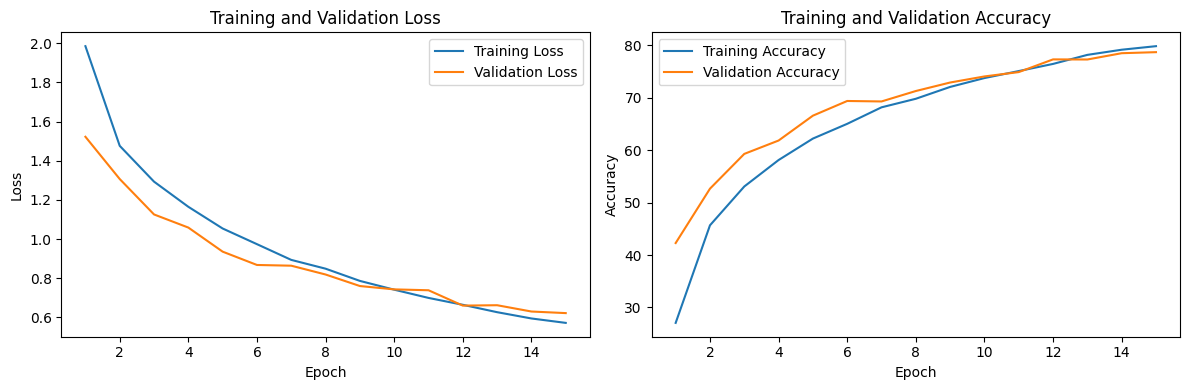

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.82      0.94      0.87      1000
           2       0.80      0.65      0.72      1000
           3       0.62      0.64      0.63      1000
           4       0.82      0.72      0.77      1000
           5       0.63      0.76      0.69      1000
           6       0.86      0.80      0.83      1000
           7       0.89      0.79      0.84      1000
           8       0.87      0.89      0.88      1000
           9       0.84      0.83      0.84      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



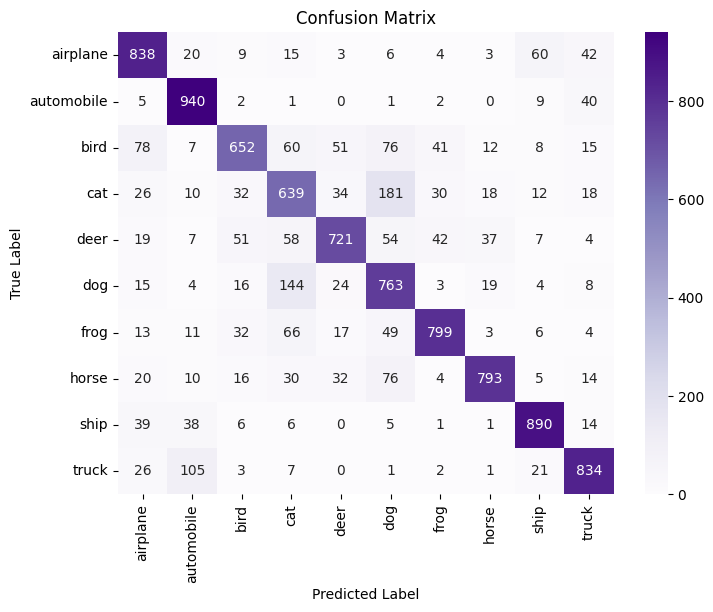

In [8]:
trueLabels, predictedLabels = getPredictions(alexNetBaseline, testLoader)

evaluateModel(alexNetBaseline, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# With Cifar-100

In [9]:
trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(alexNetBaseline, 
                                                                                     trainLoader_cifar100, 
                                                                                     testLoader_cifar100,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [04:15<00:00,  1.53it/s]


Epoch 1, Train Loss: 4.1168, Train Acc: 7.85%, Val Loss: 3.2752, Val Acc: 18.26%


Epoch 2/15: 100%|██████████| 391/391 [04:25<00:00,  1.48it/s]


Epoch 2, Train Loss: 2.9236, Train Acc: 26.06%, Val Loss: 2.5914, Val Acc: 33.20%


Epoch 3/15: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]


Epoch 3, Train Loss: 2.4993, Train Acc: 35.09%, Val Loss: 2.3367, Val Acc: 38.78%


Epoch 4/15: 100%|██████████| 391/391 [04:30<00:00,  1.44it/s]


Epoch 4, Train Loss: 2.2589, Train Acc: 40.35%, Val Loss: 2.1552, Val Acc: 43.19%


Epoch 5/15: 100%|██████████| 391/391 [04:30<00:00,  1.45it/s]


Epoch 5, Train Loss: 2.0832, Train Acc: 44.36%, Val Loss: 2.0375, Val Acc: 45.53%


Epoch 6/15: 100%|██████████| 391/391 [04:28<00:00,  1.45it/s]


Epoch 6, Train Loss: 1.9464, Train Acc: 47.42%, Val Loss: 2.0266, Val Acc: 46.22%


Epoch 7/15: 100%|██████████| 391/391 [04:29<00:00,  1.45it/s]


Epoch 7, Train Loss: 1.8249, Train Acc: 50.14%, Val Loss: 1.9129, Val Acc: 48.80%


Epoch 8/15: 100%|██████████| 391/391 [04:30<00:00,  1.44it/s]


Epoch 8, Train Loss: 1.7072, Train Acc: 53.00%, Val Loss: 1.8348, Val Acc: 50.63%


Epoch 9/15: 100%|██████████| 391/391 [04:29<00:00,  1.45it/s]


Epoch 9, Train Loss: 1.5977, Train Acc: 55.70%, Val Loss: 1.8224, Val Acc: 51.60%


Epoch 10/15: 100%|██████████| 391/391 [04:31<00:00,  1.44it/s]


Epoch 10, Train Loss: 1.4982, Train Acc: 58.12%, Val Loss: 1.7736, Val Acc: 52.74%


Epoch 11/15: 100%|██████████| 391/391 [04:31<00:00,  1.44it/s]


Epoch 11, Train Loss: 1.4004, Train Acc: 60.38%, Val Loss: 1.8148, Val Acc: 51.89%


Epoch 12/15: 100%|██████████| 391/391 [04:30<00:00,  1.44it/s]


Epoch 12, Train Loss: 1.2914, Train Acc: 63.42%, Val Loss: 1.7741, Val Acc: 53.85%


Epoch 13/15: 100%|██████████| 391/391 [04:31<00:00,  1.44it/s]


Epoch 13, Train Loss: 1.1930, Train Acc: 65.82%, Val Loss: 1.8063, Val Acc: 53.68%


Epoch 14/15: 100%|██████████| 391/391 [04:31<00:00,  1.44it/s]


Epoch 14, Train Loss: 1.1016, Train Acc: 68.01%, Val Loss: 1.7858, Val Acc: 54.20%


Epoch 15/15: 100%|██████████| 391/391 [04:31<00:00,  1.44it/s]


Epoch 15, Train Loss: 1.0061, Train Acc: 70.65%, Val Loss: 1.8341, Val Acc: 54.68%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 192, 16, 16]         110,784
              ReLU-5          [-1, 192, 16, 16]               0
         MaxPool2d-6            [-1, 192, 8, 8]               0
            Conv2d-7            [-1, 384, 8, 8]         663,936
              ReLU-8            [-1, 384, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         884,992
             ReLU-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         590,080
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 4, 4]               0
           Linear-14                 [-

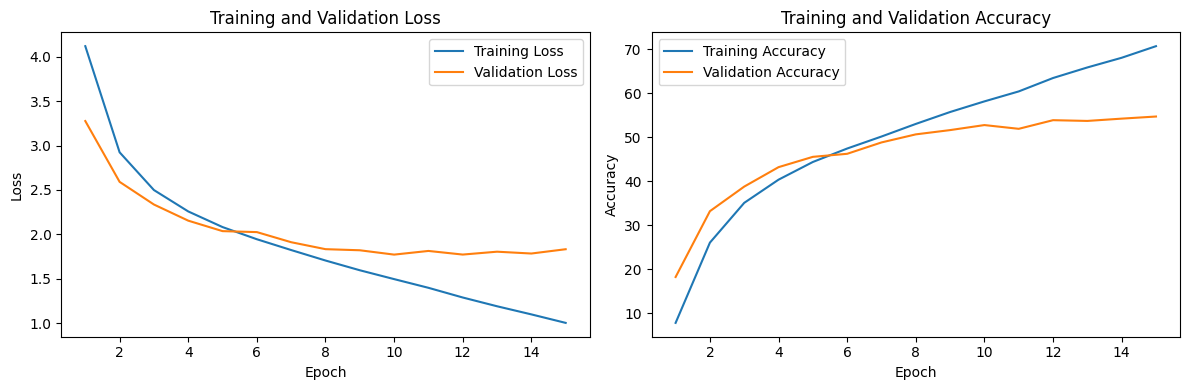

              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.59      0.76      0.67       100
           2       0.28      0.54      0.37       100
           3       0.41      0.30      0.35       100
           4       0.32      0.25      0.28       100
           5       0.48      0.56      0.52       100
           6       0.54      0.71      0.61       100
           7       0.67      0.66      0.66       100
           8       0.82      0.64      0.72       100
           9       0.74      0.58      0.65       100
          10       0.43      0.38      0.40       100
          11       0.33      0.27      0.30       100
          12       0.62      0.65      0.64       100
          13       0.59      0.39      0.47       100
          14       0.61      0.37      0.46       100
          15       0.40      0.61      0.49       100
          16       0.51      0.54      0.53       100
          17       0.70    

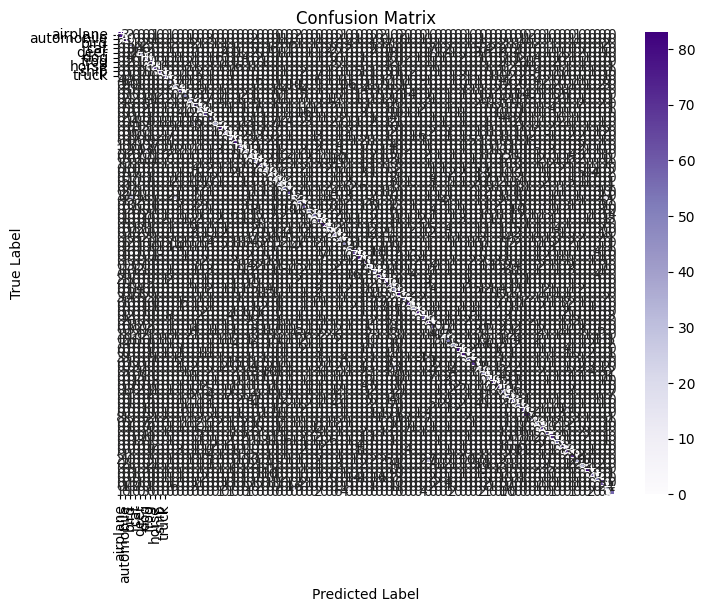

In [10]:
trueLabels, predictedLabels = getPredictions(alexNetBaseline, testLoader_cifar100)

evaluateModel(alexNetBaseline, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# Problem 1 With Drop Out

In [ ]:
alexNetModfied = ModifiedAlexNet()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(alexNetModfied, 
                                                                                     trainLoader, 
                                                                                     testLoader,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [04:34<00:00,  1.42it/s]


Epoch 1, Train Loss: 1.9891, Train Acc: 26.77%, Val Loss: 1.5898, Val Acc: 41.25%


Epoch 2/15: 100%|██████████| 391/391 [04:39<00:00,  1.40it/s]


Epoch 2, Train Loss: 1.5182, Train Acc: 43.56%, Val Loss: 1.3423, Val Acc: 51.43%


Epoch 3/15: 100%|██████████| 391/391 [04:52<00:00,  1.34it/s]


Epoch 3, Train Loss: 1.3256, Train Acc: 51.48%, Val Loss: 1.2125, Val Acc: 55.43%


Epoch 4/15: 100%|██████████| 391/391 [04:56<00:00,  1.32it/s]


Epoch 4, Train Loss: 1.1822, Train Acc: 57.09%, Val Loss: 1.0471, Val Acc: 62.63%


Epoch 5/15: 100%|██████████| 391/391 [04:58<00:00,  1.31it/s]


Epoch 5, Train Loss: 1.0730, Train Acc: 61.68%, Val Loss: 1.0569, Val Acc: 62.54%


Epoch 6/15: 100%|██████████| 391/391 [04:57<00:00,  1.32it/s]


Epoch 6, Train Loss: 0.9839, Train Acc: 64.93%, Val Loss: 0.9178, Val Acc: 67.44%


Epoch 7/15: 100%|██████████| 391/391 [04:55<00:00,  1.32it/s]


Epoch 7, Train Loss: 0.9192, Train Acc: 67.13%, Val Loss: 0.8650, Val Acc: 69.29%


Epoch 8/15: 100%|██████████| 391/391 [04:57<00:00,  1.31it/s]


Epoch 8, Train Loss: 0.8492, Train Acc: 69.51%, Val Loss: 0.7834, Val Acc: 72.52%


Epoch 9/15: 100%|██████████| 391/391 [04:58<00:00,  1.31it/s]


Epoch 9, Train Loss: 0.8038, Train Acc: 71.62%, Val Loss: 0.7459, Val Acc: 73.47%


Epoch 10/15: 100%|██████████| 391/391 [04:56<00:00,  1.32it/s]


Epoch 10, Train Loss: 0.7504, Train Acc: 73.35%, Val Loss: 0.7344, Val Acc: 74.33%


Epoch 11/15: 100%|██████████| 391/391 [04:57<00:00,  1.31it/s]


Epoch 11, Train Loss: 0.7155, Train Acc: 74.75%, Val Loss: 0.6784, Val Acc: 76.18%


Epoch 12/15: 100%|██████████| 391/391 [04:52<00:00,  1.33it/s]


Epoch 12, Train Loss: 0.6821, Train Acc: 75.95%, Val Loss: 0.6666, Val Acc: 76.51%


Epoch 13/15: 100%|██████████| 391/391 [04:59<00:00,  1.31it/s]


Epoch 13, Train Loss: 0.6407, Train Acc: 77.53%, Val Loss: 0.6571, Val Acc: 77.25%


Epoch 14/15: 100%|██████████| 391/391 [04:58<00:00,  1.31it/s]


Epoch 14, Train Loss: 0.6190, Train Acc: 78.18%, Val Loss: 0.6100, Val Acc: 78.90%


Epoch 15/15: 100%|██████████| 391/391 [04:57<00:00,  1.31it/s]


Epoch 15, Train Loss: 0.5893, Train Acc: 79.32%, Val Loss: 0.5914, Val Acc: 79.70%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 192, 16, 16]         110,784
              ReLU-5          [-1, 192, 16, 16]               0
         MaxPool2d-6            [-1, 192, 8, 8]               0
            Conv2d-7            [-1, 384, 8, 8]         663,936
              ReLU-8            [-1, 384, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         884,992
             ReLU-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         590,080
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 4, 4]               0
          Dropout-14                 [-

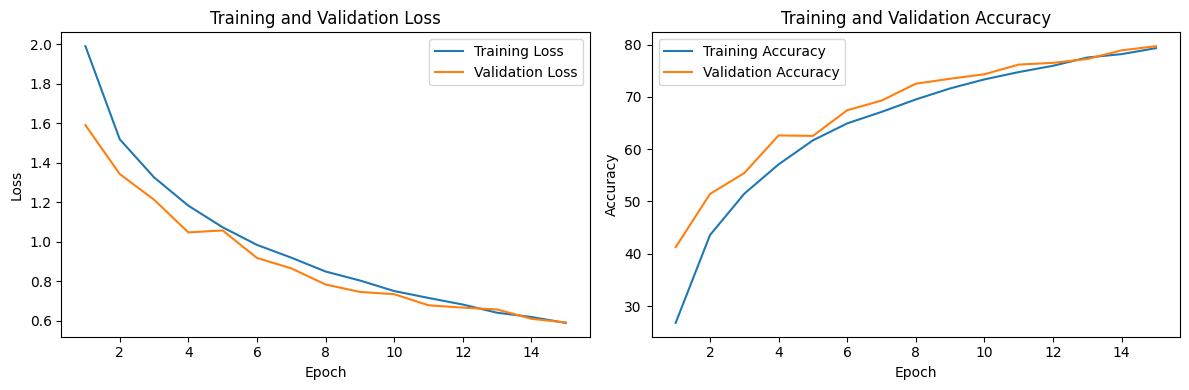

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.92      0.89      0.90      1000
           2       0.71      0.72      0.71      1000
           3       0.65      0.62      0.64      1000
           4       0.81      0.75      0.78      1000
           5       0.76      0.66      0.71      1000
           6       0.79      0.89      0.84      1000
           7       0.82      0.84      0.83      1000
           8       0.83      0.92      0.87      1000
           9       0.86      0.87      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



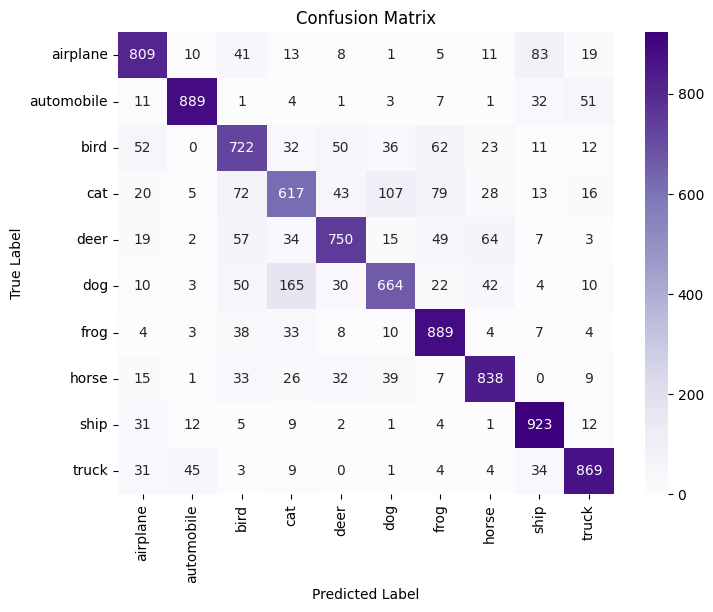

In [12]:
trueLabels, predictedLabels = getPredictions(alexNetModfied, testLoader)

evaluateModel(alexNetModfied, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# With CIFAR-100

In [20]:
alexNetModfied = ModifiedAlexNet()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(alexNetModfied, 
                                                                                     trainLoader, 
                                                                                     testLoader,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [01:36<00:00,  4.05it/s]


Epoch 1, Train Loss: 2.0074, Train Acc: 25.44%, Val Loss: 1.5976, Val Acc: 41.11%


Epoch 2/15: 100%|██████████| 391/391 [01:37<00:00,  4.02it/s]


Epoch 2, Train Loss: 1.5001, Train Acc: 43.97%, Val Loss: 1.3072, Val Acc: 51.91%


Epoch 3/15: 100%|██████████| 391/391 [01:41<00:00,  3.84it/s]


Epoch 3, Train Loss: 1.3053, Train Acc: 52.11%, Val Loss: 1.1486, Val Acc: 58.40%


Epoch 4/15: 100%|██████████| 391/391 [01:41<00:00,  3.84it/s]


Epoch 4, Train Loss: 1.1671, Train Acc: 57.74%, Val Loss: 1.0048, Val Acc: 63.98%


Epoch 5/15: 100%|██████████| 391/391 [01:42<00:00,  3.82it/s]


Epoch 5, Train Loss: 1.0527, Train Acc: 62.14%, Val Loss: 0.9421, Val Acc: 66.52%


Epoch 6/15: 100%|██████████| 391/391 [01:42<00:00,  3.83it/s]


Epoch 6, Train Loss: 0.9564, Train Acc: 65.84%, Val Loss: 0.8753, Val Acc: 69.21%


Epoch 7/15: 100%|██████████| 391/391 [01:42<00:00,  3.80it/s]


Epoch 7, Train Loss: 0.8811, Train Acc: 68.53%, Val Loss: 0.8229, Val Acc: 70.79%


Epoch 8/15: 100%|██████████| 391/391 [01:41<00:00,  3.85it/s]


Epoch 8, Train Loss: 0.8165, Train Acc: 70.81%, Val Loss: 0.7705, Val Acc: 72.16%


Epoch 9/15: 100%|██████████| 391/391 [01:42<00:00,  3.80it/s]


Epoch 9, Train Loss: 0.7707, Train Acc: 72.81%, Val Loss: 0.6998, Val Acc: 75.36%


Epoch 10/15: 100%|██████████| 391/391 [01:42<00:00,  3.80it/s]


Epoch 10, Train Loss: 0.7160, Train Acc: 74.49%, Val Loss: 0.6984, Val Acc: 75.53%


Epoch 11/15: 100%|██████████| 391/391 [01:42<00:00,  3.80it/s]


Epoch 11, Train Loss: 0.6835, Train Acc: 75.80%, Val Loss: 0.6486, Val Acc: 77.62%


Epoch 12/15: 100%|██████████| 391/391 [01:42<00:00,  3.82it/s]


Epoch 12, Train Loss: 0.6397, Train Acc: 77.52%, Val Loss: 0.6497, Val Acc: 77.59%


Epoch 13/15: 100%|██████████| 391/391 [01:44<00:00,  3.73it/s]


Epoch 13, Train Loss: 0.6137, Train Acc: 78.53%, Val Loss: 0.6265, Val Acc: 78.10%


Epoch 14/15: 100%|██████████| 391/391 [01:45<00:00,  3.70it/s]


Epoch 14, Train Loss: 0.5804, Train Acc: 79.57%, Val Loss: 0.6113, Val Acc: 79.09%


Epoch 15/15: 100%|██████████| 391/391 [01:43<00:00,  3.79it/s]


Epoch 15, Train Loss: 0.5541, Train Acc: 80.67%, Val Loss: 0.5927, Val Acc: 79.19%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
         MaxPool2d-3           [-1, 64, 16, 16]               0
            Conv2d-4          [-1, 192, 16, 16]         110,784
              ReLU-5          [-1, 192, 16, 16]               0
         MaxPool2d-6            [-1, 192, 8, 8]               0
            Conv2d-7            [-1, 384, 8, 8]         663,936
              ReLU-8            [-1, 384, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         884,992
             ReLU-10            [-1, 256, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         590,080
             ReLU-12            [-1, 256, 8, 8]               0
        MaxPool2d-13            [-1, 256, 4, 4]               0
          Dropout-14                 [-

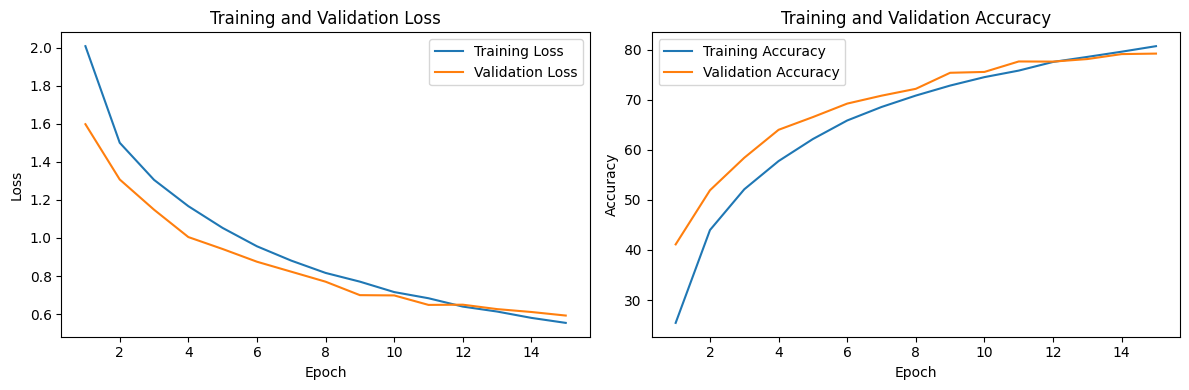

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.01      0.02      0.01       100
           2       0.00      0.07      0.01       100
           3       0.01      0.15      0.02       100
           4       0.02      0.19      0.03       100
           5       0.01      0.09      0.01       100
           6       0.02      0.25      0.04       100
           7       0.00      0.00      0.00       100
           8       0.00      0.02      0.00       100
           9       0.01      0.13      0.02       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.00      0.00      0.00       100
          14       0.00      0.00      0.00       100
          15       0.00      0.00      0.00       100
          16       0.00      0.00      0.00       100
          17       0.00    

C:\Users\Matt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Matt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Matt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

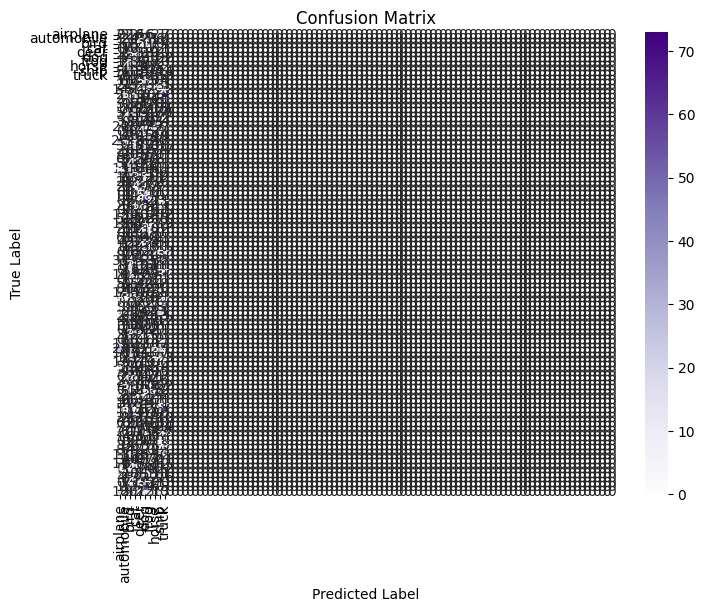

In [21]:
trueLabels, predictedLabels = getPredictions(alexNetModfied, testLoader_cifar100)

evaluateModel(alexNetModfied, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# Problem 2

Repeat the problem 1 this time for VGGNet. Identify the VGG configuration that matches the nearest number of parameters to the AlexNet Architecture that you did for problem 1 for CIFAR-10 and CIFAR-100 datasets. Compare your training and evaluation results against AlexNet in Problem 1.

Here is a good reference guide to AlexNet: https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guideLinks to an external site.Links to an external site.

Explore the option of applying Dropout techniques for training your customized AlexNet. Compare the training and validation results against the baseline model without any dropout. Also, compare the results between CIFAR-10 and CIFAR-100.

In [13]:
vggNetModel = ModifiedVGG()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(vggNetModel, 
                                                                                     trainLoader, 
                                                                                     testLoader,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [04:57<00:00,  1.31it/s]


Epoch 1, Train Loss: 2.0806, Train Acc: 23.94%, Val Loss: 1.5978, Val Acc: 40.43%


Epoch 2/15: 100%|██████████| 391/391 [05:03<00:00,  1.29it/s]


Epoch 2, Train Loss: 1.5628, Train Acc: 41.85%, Val Loss: 1.4289, Val Acc: 46.28%


Epoch 3/15: 100%|██████████| 391/391 [05:14<00:00,  1.24it/s]


Epoch 3, Train Loss: 1.3789, Train Acc: 49.54%, Val Loss: 1.2240, Val Acc: 55.40%


Epoch 4/15: 100%|██████████| 391/391 [05:16<00:00,  1.24it/s]


Epoch 4, Train Loss: 1.2330, Train Acc: 55.09%, Val Loss: 1.1110, Val Acc: 59.86%


Epoch 5/15: 100%|██████████| 391/391 [05:16<00:00,  1.24it/s]


Epoch 5, Train Loss: 1.1253, Train Acc: 59.47%, Val Loss: 1.0052, Val Acc: 63.90%


Epoch 6/15: 100%|██████████| 391/391 [05:17<00:00,  1.23it/s]


Epoch 6, Train Loss: 1.0424, Train Acc: 62.54%, Val Loss: 0.9133, Val Acc: 66.95%


Epoch 7/15: 100%|██████████| 391/391 [05:18<00:00,  1.23it/s]


Epoch 7, Train Loss: 0.9714, Train Acc: 65.27%, Val Loss: 0.8723, Val Acc: 68.69%


Epoch 8/15: 100%|██████████| 391/391 [05:17<00:00,  1.23it/s]


Epoch 8, Train Loss: 0.9119, Train Acc: 67.37%, Val Loss: 0.8057, Val Acc: 71.56%


Epoch 9/15: 100%|██████████| 391/391 [05:10<00:00,  1.26it/s]


Epoch 9, Train Loss: 0.8613, Train Acc: 69.15%, Val Loss: 0.7811, Val Acc: 72.50%


Epoch 10/15: 100%|██████████| 391/391 [05:17<00:00,  1.23it/s]


Epoch 10, Train Loss: 0.8144, Train Acc: 71.15%, Val Loss: 0.7314, Val Acc: 74.25%


Epoch 11/15: 100%|██████████| 391/391 [05:17<00:00,  1.23it/s]


Epoch 11, Train Loss: 0.7756, Train Acc: 72.55%, Val Loss: 0.6785, Val Acc: 76.30%


Epoch 12/15: 100%|██████████| 391/391 [05:18<00:00,  1.23it/s]


Epoch 12, Train Loss: 0.7314, Train Acc: 74.31%, Val Loss: 0.6748, Val Acc: 76.27%


Epoch 13/15: 100%|██████████| 391/391 [05:17<00:00,  1.23it/s]


Epoch 13, Train Loss: 0.7003, Train Acc: 75.11%, Val Loss: 0.6480, Val Acc: 77.58%


Epoch 14/15: 100%|██████████| 391/391 [05:15<00:00,  1.24it/s]


Epoch 14, Train Loss: 0.6771, Train Acc: 76.14%, Val Loss: 0.6282, Val Acc: 78.01%


Epoch 15/15: 100%|██████████| 391/391 [05:16<00:00,  1.24it/s]


Epoch 15, Train Loss: 0.6425, Train Acc: 77.18%, Val Loss: 0.5786, Val Acc: 79.87%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

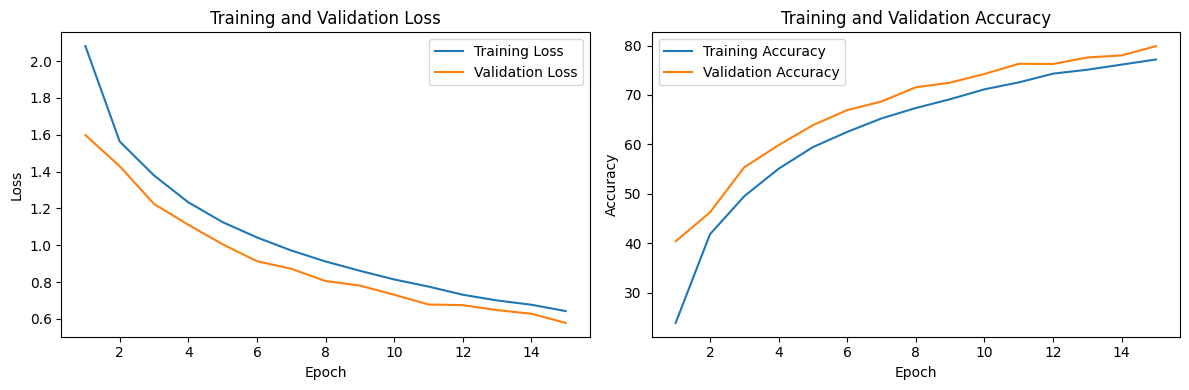

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1000
           1       0.92      0.88      0.90      1000
           2       0.75      0.66      0.70      1000
           3       0.58      0.71      0.64      1000
           4       0.78      0.77      0.77      1000
           5       0.77      0.65      0.70      1000
           6       0.86      0.82      0.84      1000
           7       0.81      0.86      0.84      1000
           8       0.89      0.89      0.89      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



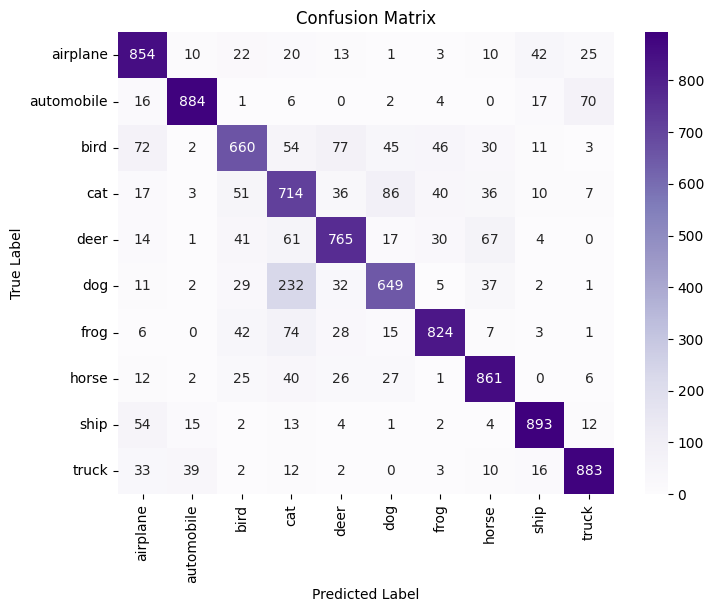

In [14]:
trueLabels, predictedLabels = getPredictions(vggNetModel, testLoader)

evaluateModel(vggNetModel, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# Problem 2 With Cifar 100

In [11]:
vggNetModel = ModifiedVGG()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(vggNetModel, 
                                                                                     trainLoader_cifar100, 
                                                                                     testLoader_cifar100,
                                                                                     learningRate=0.001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [01:19<00:00,  4.94it/s]


Epoch 1, Train Loss: 4.2695, Train Acc: 4.03%, Val Loss: 3.8539, Val Acc: 8.88%


Epoch 2/15: 100%|██████████| 391/391 [01:21<00:00,  4.80it/s]


Epoch 2, Train Loss: 3.7218, Train Acc: 10.88%, Val Loss: 3.4216, Val Acc: 16.05%


Epoch 3/15: 100%|██████████| 391/391 [01:26<00:00,  4.51it/s]


Epoch 3, Train Loss: 3.3760, Train Acc: 17.15%, Val Loss: 3.1493, Val Acc: 21.45%


Epoch 4/15: 100%|██████████| 391/391 [01:28<00:00,  4.41it/s]


Epoch 4, Train Loss: 3.1337, Train Acc: 21.42%, Val Loss: 2.8741, Val Acc: 27.44%


Epoch 5/15: 100%|██████████| 391/391 [01:28<00:00,  4.43it/s]


Epoch 5, Train Loss: 2.9324, Train Acc: 25.43%, Val Loss: 2.6471, Val Acc: 31.59%


Epoch 6/15: 100%|██████████| 391/391 [01:28<00:00,  4.44it/s]


Epoch 6, Train Loss: 2.7582, Train Acc: 28.69%, Val Loss: 2.5092, Val Acc: 33.64%


Epoch 7/15: 100%|██████████| 391/391 [01:28<00:00,  4.43it/s]


Epoch 7, Train Loss: 2.6067, Train Acc: 31.88%, Val Loss: 2.4114, Val Acc: 36.18%


Epoch 8/15: 100%|██████████| 391/391 [01:28<00:00,  4.44it/s]


Epoch 8, Train Loss: 2.5032, Train Acc: 34.19%, Val Loss: 2.2693, Val Acc: 39.64%


Epoch 9/15: 100%|██████████| 391/391 [01:29<00:00,  4.38it/s]


Epoch 9, Train Loss: 2.4062, Train Acc: 36.31%, Val Loss: 2.2570, Val Acc: 39.33%


Epoch 10/15: 100%|██████████| 391/391 [01:27<00:00,  4.45it/s]


Epoch 10, Train Loss: 2.3329, Train Acc: 37.52%, Val Loss: 2.1326, Val Acc: 42.49%


Epoch 11/15: 100%|██████████| 391/391 [01:28<00:00,  4.43it/s]


Epoch 11, Train Loss: 2.2635, Train Acc: 39.19%, Val Loss: 2.0953, Val Acc: 43.67%


Epoch 12/15: 100%|██████████| 391/391 [01:28<00:00,  4.44it/s]


Epoch 12, Train Loss: 2.2084, Train Acc: 40.58%, Val Loss: 2.0543, Val Acc: 44.67%


Epoch 13/15: 100%|██████████| 391/391 [01:28<00:00,  4.44it/s]


Epoch 13, Train Loss: 2.1560, Train Acc: 41.84%, Val Loss: 2.0156, Val Acc: 46.29%


Epoch 14/15: 100%|██████████| 391/391 [01:28<00:00,  4.42it/s]


Epoch 14, Train Loss: 2.1072, Train Acc: 42.91%, Val Loss: 1.9937, Val Acc: 46.14%


Epoch 15/15: 100%|██████████| 391/391 [01:28<00:00,  4.41it/s]


Epoch 15, Train Loss: 2.0766, Train Acc: 43.72%, Val Loss: 2.0076, Val Acc: 46.10%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

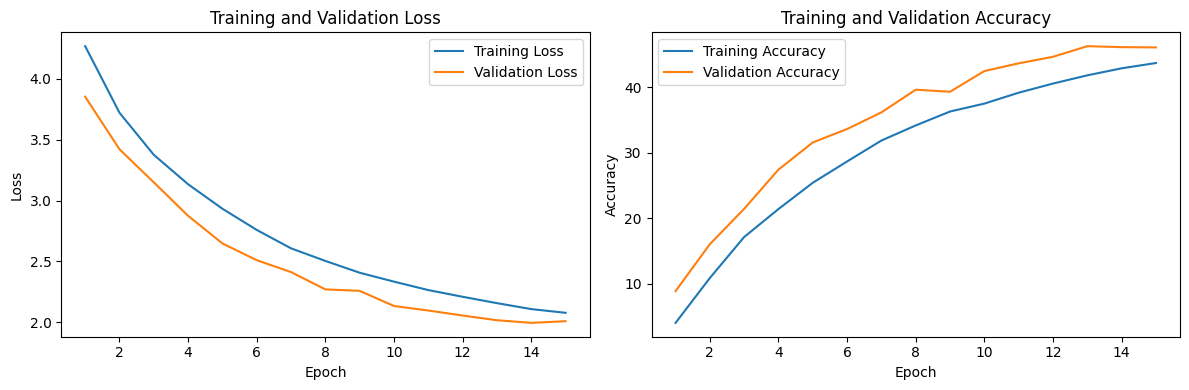

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       100
           1       0.51      0.42      0.46       100
           2       0.32      0.36      0.34       100
           3       0.17      0.14      0.15       100
           4       0.26      0.30      0.28       100
           5       0.44      0.47      0.45       100
           6       0.43      0.53      0.48       100
           7       0.52      0.36      0.43       100
           8       0.72      0.51      0.60       100
           9       0.50      0.72      0.59       100
          10       0.41      0.26      0.32       100
          11       0.19      0.14      0.16       100
          12       0.41      0.53      0.46       100
          13       0.37      0.41      0.39       100
          14       0.41      0.24      0.30       100
          15       0.34      0.36      0.35       100
          16       0.41      0.53      0.46       100
          17       0.63    

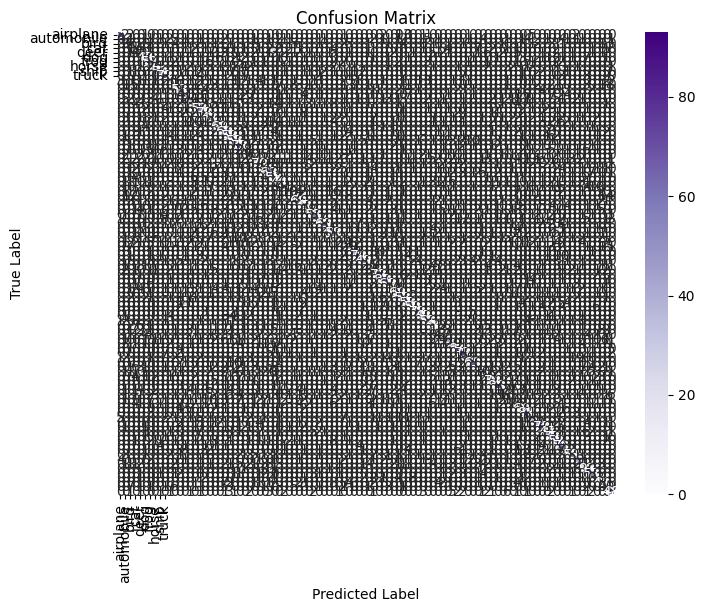

In [12]:
trueLabels, predictedLabels = getPredictions(vggNetModel, testLoader_cifar100)

evaluateModel(vggNetModel, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# Problem 3

The baseline model we did in lectures is called ResNet-11. Build a new version of ResNet (ResNet-18). Train it on CIFAR-10 and CIFAR-100 datasets. Plot the training loss, validation loss, and validation accuracy. Compare the classification accuracy, and model size across the two versions of ResNet (11, 18). How does the complexity grow as you increase the network depth?

You can find some references for ResNet 18 here:

https://www.kaggle.com/code/ivankunyankin/resnet18-from-scratch-using-pytorchLinks to an external site.

Explore the dropout option for the two networks and report your training results and validation accuracy. Also, compare the results between CIFAR-10 and CIFAR-100.

In [8]:
resNet18Model = ResNet18()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(resNet18Model, 
                                                                                     trainLoader, 
                                                                                     testLoader,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [03:44<00:00,  1.74it/s]


Epoch 1, Train Loss: 1.3798, Train Acc: 49.81%, Val Loss: 1.2696, Val Acc: 54.21%


Epoch 2/15: 100%|██████████| 391/391 [03:52<00:00,  1.69it/s]


Epoch 2, Train Loss: 0.9564, Train Acc: 65.96%, Val Loss: 0.8567, Val Acc: 70.25%


Epoch 3/15: 100%|██████████| 391/391 [04:22<00:00,  1.49it/s]


Epoch 3, Train Loss: 0.7616, Train Acc: 72.86%, Val Loss: 0.6892, Val Acc: 76.06%


Epoch 4/15: 100%|██████████| 391/391 [07:23<00:00,  1.13s/it]


Epoch 4, Train Loss: 0.6461, Train Acc: 77.51%, Val Loss: 0.8564, Val Acc: 71.46%


Epoch 5/15: 100%|██████████| 391/391 [10:10<00:00,  1.56s/it]


Epoch 5, Train Loss: 0.5705, Train Acc: 80.17%, Val Loss: 0.7812, Val Acc: 73.77%


Epoch 6/15: 100%|██████████| 391/391 [10:16<00:00,  1.58s/it]


Epoch 6, Train Loss: 0.5130, Train Acc: 82.17%, Val Loss: 0.5957, Val Acc: 79.75%


Epoch 7/15: 100%|██████████| 391/391 [10:18<00:00,  1.58s/it]


Epoch 7, Train Loss: 0.4637, Train Acc: 83.79%, Val Loss: 0.5995, Val Acc: 80.04%


Epoch 8/15: 100%|██████████| 391/391 [07:44<00:00,  1.19s/it]


Epoch 8, Train Loss: 0.4260, Train Acc: 85.12%, Val Loss: 0.5679, Val Acc: 81.06%


Epoch 9/15: 100%|██████████| 391/391 [04:06<00:00,  1.58it/s]


Epoch 9, Train Loss: 0.3901, Train Acc: 86.45%, Val Loss: 0.5579, Val Acc: 81.35%


Epoch 10/15: 100%|██████████| 391/391 [04:09<00:00,  1.57it/s]


Epoch 10, Train Loss: 0.3665, Train Acc: 87.20%, Val Loss: 0.5256, Val Acc: 83.06%


Epoch 11/15: 100%|██████████| 391/391 [04:08<00:00,  1.57it/s]


Epoch 11, Train Loss: 0.3396, Train Acc: 88.13%, Val Loss: 0.4458, Val Acc: 85.34%


Epoch 12/15: 100%|██████████| 391/391 [04:10<00:00,  1.56it/s]


Epoch 12, Train Loss: 0.3175, Train Acc: 88.98%, Val Loss: 0.5164, Val Acc: 83.32%


Epoch 13/15: 100%|██████████| 391/391 [05:12<00:00,  1.25it/s]


Epoch 13, Train Loss: 0.2916, Train Acc: 89.75%, Val Loss: 0.4190, Val Acc: 86.54%


Epoch 14/15: 100%|██████████| 391/391 [04:08<00:00,  1.57it/s]


Epoch 14, Train Loss: 0.2801, Train Acc: 90.17%, Val Loss: 0.4393, Val Acc: 85.97%


Epoch 15/15: 100%|██████████| 391/391 [04:07<00:00,  1.58it/s]


Epoch 15, Train Loss: 0.2578, Train Acc: 90.97%, Val Loss: 0.4172, Val Acc: 86.93%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
          Identity-7           [-1, 64, 32, 32]               0
    ResidualBloack-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
         Identity-13           [-1, 64, 32, 32]               0
   ResidualBloack-14           [-1, 64,

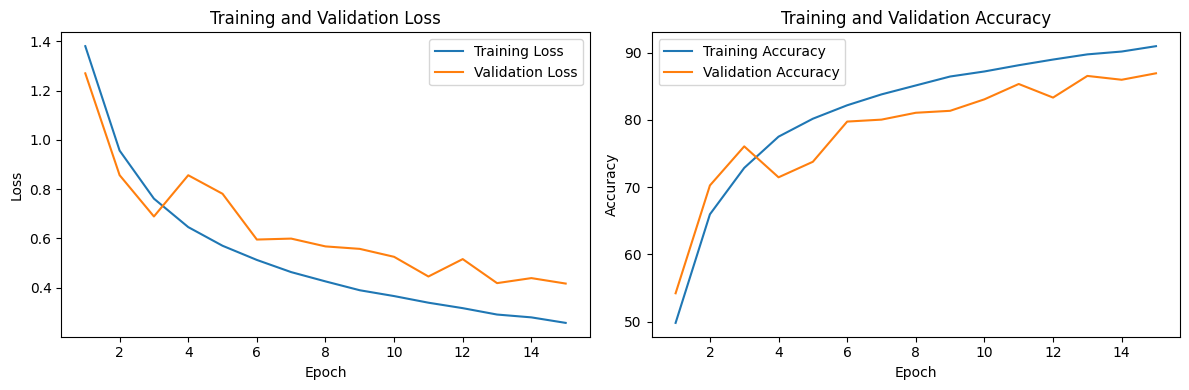

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1000
           1       0.97      0.92      0.94      1000
           2       0.93      0.73      0.82      1000
           3       0.82      0.70      0.76      1000
           4       0.84      0.90      0.87      1000
           5       0.80      0.82      0.81      1000
           6       0.88      0.91      0.89      1000
           7       0.81      0.95      0.88      1000
           8       0.90      0.95      0.93      1000
           9       0.89      0.96      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



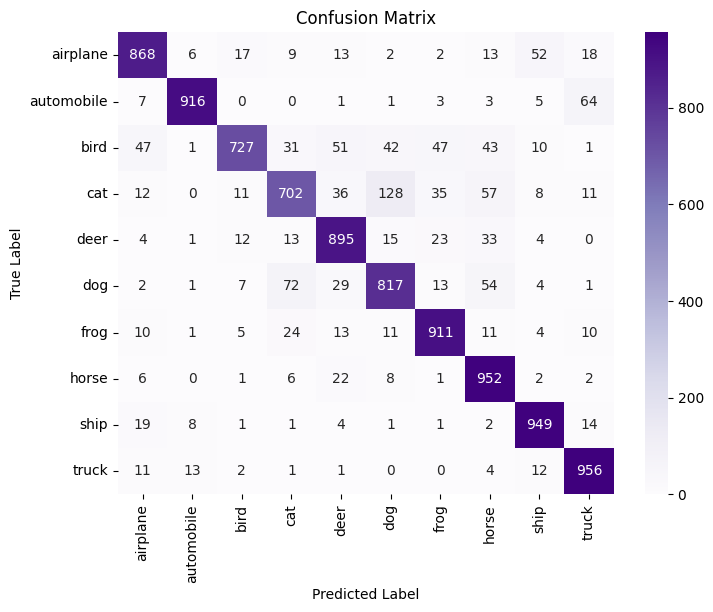

In [9]:
trueLabels, predictedLabels = getPredictions(resNet18Model, testLoader)

evaluateModel(resNet18Model, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)

# Problem 3 With Cifar 100

In [8]:
resNet18Model = ResNet18()

trainLosses, valLosses, trainAccuracies, valAccuracies, epoch_times = trainModel(resNet18Model, 
                                                                                     trainLoader_cifar100, 
                                                                                     testLoader_cifar100,
                                                                                     learningRate=0.0001, 
                                                                                     numEpochs=15)

Training on CPU


Epoch 1/15: 100%|██████████| 391/391 [05:53<00:00,  1.11it/s]


Epoch 1, Train Loss: 3.5986, Train Acc: 15.27%, Val Loss: 3.1154, Val Acc: 23.49%


Epoch 2/15: 100%|██████████| 391/391 [04:11<00:00,  1.56it/s]


Epoch 2, Train Loss: 2.8462, Train Acc: 28.42%, Val Loss: 2.7422, Val Acc: 30.08%


Epoch 3/15: 100%|██████████| 391/391 [10:05<00:00,  1.55s/it]


Epoch 3, Train Loss: 2.4234, Train Acc: 36.74%, Val Loss: 2.4568, Val Acc: 35.94%


Epoch 4/15: 100%|██████████| 391/391 [05:24<00:00,  1.21it/s]


Epoch 4, Train Loss: 2.1179, Train Acc: 43.69%, Val Loss: 2.1792, Val Acc: 42.11%


Epoch 5/15: 100%|██████████| 391/391 [04:16<00:00,  1.53it/s]


Epoch 5, Train Loss: 1.8940, Train Acc: 48.63%, Val Loss: 2.0435, Val Acc: 45.28%


Epoch 6/15: 100%|██████████| 391/391 [07:47<00:00,  1.20s/it]


Epoch 6, Train Loss: 1.7068, Train Acc: 53.17%, Val Loss: 1.8832, Val Acc: 48.92%


Epoch 7/15: 100%|██████████| 391/391 [04:52<00:00,  1.33it/s]


Epoch 7, Train Loss: 1.5628, Train Acc: 56.40%, Val Loss: 1.7067, Val Acc: 53.18%


Epoch 8/15: 100%|██████████| 391/391 [04:15<00:00,  1.53it/s]


Epoch 8, Train Loss: 1.4408, Train Acc: 59.54%, Val Loss: 1.7038, Val Acc: 54.27%


Epoch 9/15: 100%|██████████| 391/391 [04:18<00:00,  1.51it/s]


Epoch 9, Train Loss: 1.3343, Train Acc: 61.91%, Val Loss: 1.6900, Val Acc: 54.30%


Epoch 10/15: 100%|██████████| 391/391 [06:07<00:00,  1.06it/s]


Epoch 10, Train Loss: 1.2369, Train Acc: 64.70%, Val Loss: 1.5691, Val Acc: 56.82%


Epoch 11/15: 100%|██████████| 391/391 [09:13<00:00,  1.42s/it]


Epoch 11, Train Loss: 1.1523, Train Acc: 66.67%, Val Loss: 1.5491, Val Acc: 57.67%


Epoch 12/15: 100%|██████████| 391/391 [04:10<00:00,  1.56it/s]


Epoch 12, Train Loss: 1.0713, Train Acc: 68.92%, Val Loss: 1.4913, Val Acc: 58.69%


Epoch 13/15: 100%|██████████| 391/391 [04:11<00:00,  1.56it/s]


Epoch 13, Train Loss: 1.0016, Train Acc: 70.84%, Val Loss: 1.4588, Val Acc: 59.83%


Epoch 14/15: 100%|██████████| 391/391 [04:13<00:00,  1.54it/s]


Epoch 14, Train Loss: 0.9449, Train Acc: 72.18%, Val Loss: 1.3701, Val Acc: 61.85%


Epoch 15/15: 100%|██████████| 391/391 [04:10<00:00,  1.56it/s]


Epoch 15, Train Loss: 0.8838, Train Acc: 73.86%, Val Loss: 1.4314, Val Acc: 61.46%


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
              ReLU-5           [-1, 64, 32, 32]               0
           Dropout-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
      ResNetBlock-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
          Dropout-14           [-1, 64,

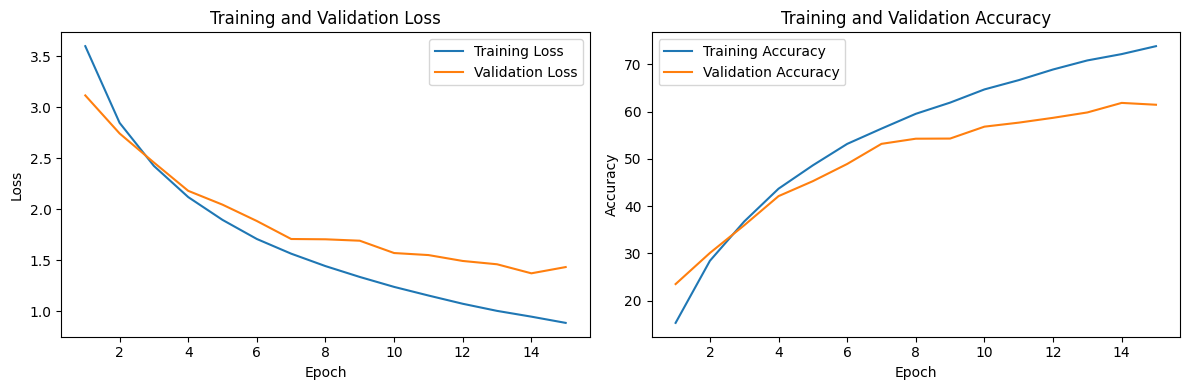

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.81      0.70      0.75       100
           2       0.57      0.36      0.44       100
           3       0.43      0.40      0.41       100
           4       0.37      0.55      0.45       100
           5       0.66      0.64      0.65       100
           6       0.82      0.53      0.64       100
           7       0.81      0.52      0.63       100
           8       0.85      0.69      0.76       100
           9       0.65      0.81      0.72       100
          10       0.62      0.34      0.44       100
          11       0.41      0.51      0.45       100
          12       0.52      0.80      0.63       100
          13       0.56      0.62      0.59       100
          14       0.51      0.62      0.56       100
          15       0.53      0.71      0.60       100
          16       0.53      0.72      0.61       100
          17       0.82    

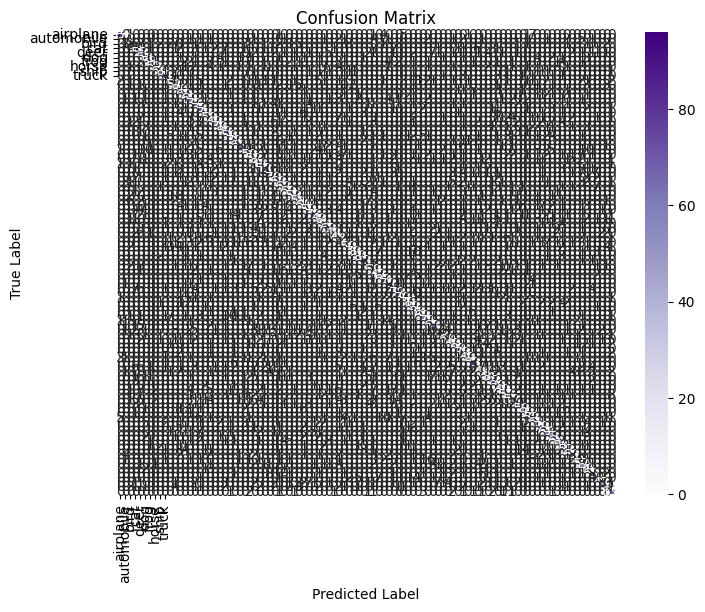

In [9]:
trueLabels, predictedLabels = getPredictions(resNet18Model, testLoader_cifar100)

evaluateModel(resNet18Model, trainLosses, valLosses, trainAccuracies, valAccuracies, trueLabels, predictedLabels, classLabels, epochTimes = epoch_times)